In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread("./images/00-puppy.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("./images/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
img2 = cv2.resize(img2, (600, 600))

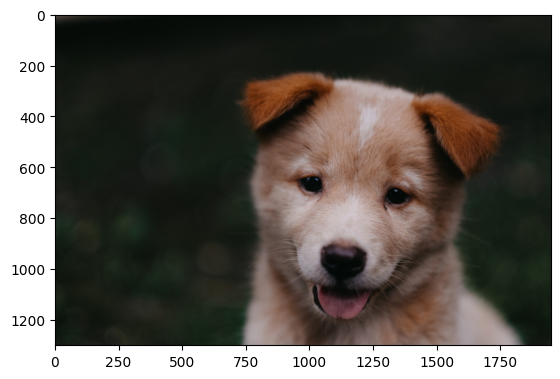

In [4]:
plt.imshow(img1)

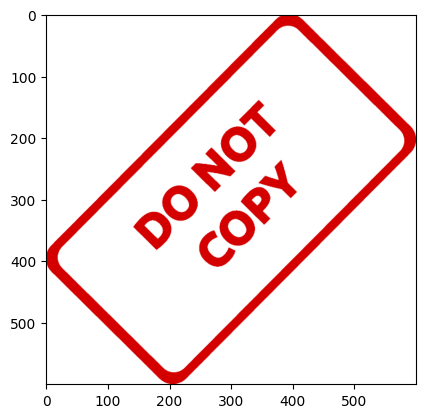

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(1300, 1950, 3)

In [7]:
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

In [8]:
img2.shape

(600, 600, 3)

In [9]:
rows, cols, channels = img2.shape

## Region of Interest (ROI)

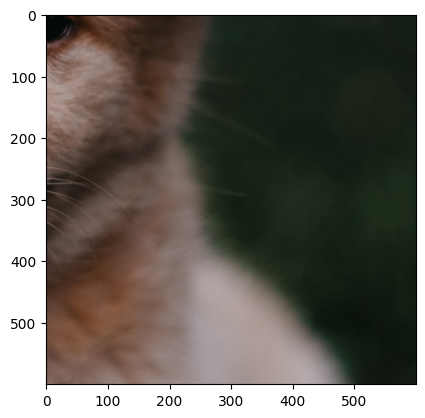

In [10]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]] # roi = region of interest

plt.imshow(roi)

## Masking

### Converting to grayscale

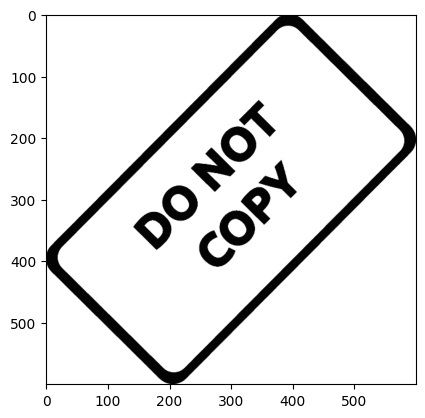

In [11]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.imshow(img2_gray, cmap="gray")

### Mask Inversion

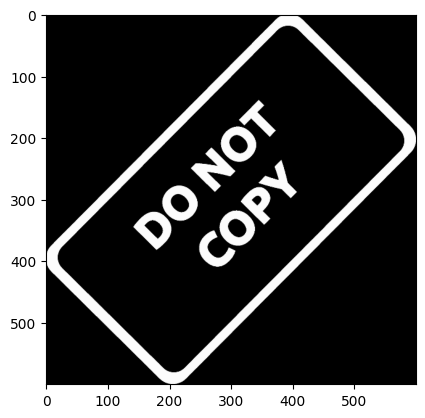

In [12]:
mask_inv = cv2.bitwise_not(img2_gray) # inverse of the mask

plt.imshow(mask_inv, cmap="gray")

In [13]:
mask_inv.shape # No color channels

(600, 600)

### White Background

In [14]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [15]:
white_background.shape

(600, 600, 3)

### Black Background

In [16]:
background = cv2.bitwise_or(white_background,
                    white_background,
                    mask=mask_inv
                    )

In [17]:
background.shape

(600, 600, 3)

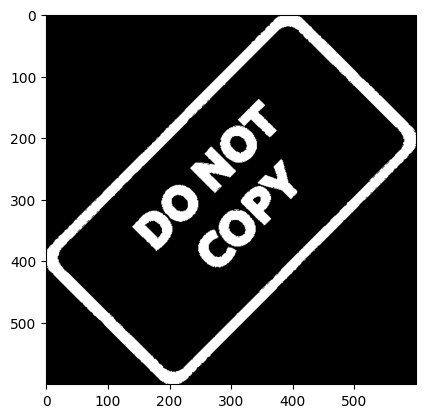

In [18]:
plt.imshow(background)

### Foreground

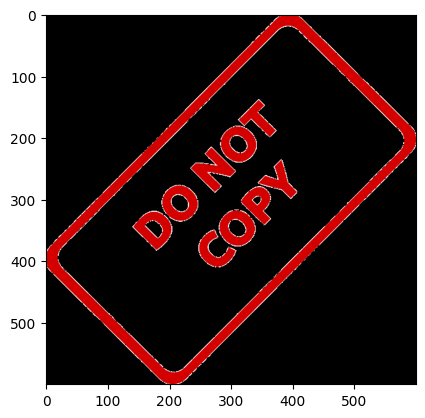

In [19]:
foreground = cv2.bitwise_or(img2, img2, mask=mask_inv)

plt.imshow(foreground)

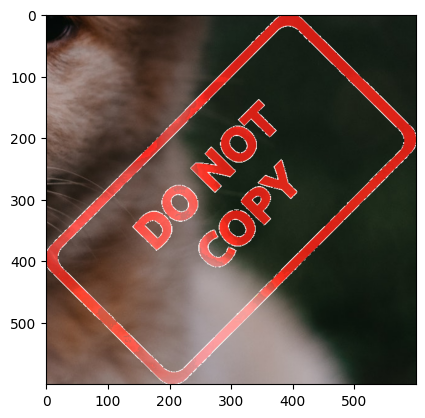

In [20]:
final_roi = cv2.bitwise_or(roi, foreground)

plt.imshow(final_roi)

In [21]:
large_img = img1
small_img = img2

In [22]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = final_roi

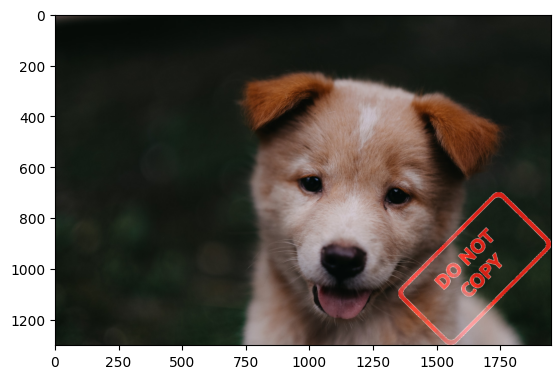

In [23]:
plt.imshow(large_img)